In [130]:
#import all libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
#read the loan data set
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [132]:
#some information of the data set
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [120]:
loan_data.shape

(39717, 111)

In [121]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [122]:
loan_data.value_counts()

Series([], Name: count, dtype: int64)

In [123]:
#checking for null values in the loan data
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [124]:
#dropping all the empty columns from the data set
loan_data.dropna(axis = 1, how = "all", inplace = True)
loan_data.shape

(39717, 57)

In [125]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [126]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [127]:
#multiple columns only having single value. We can drop them from the data set
loan_data.drop(["pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", 
                "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"], axis = 1, inplace = True)
loan_data.shape

(39717, 48)

In [128]:
loan_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [129]:
#3 columns have > 70% null values. We can drop them
loan_data.drop(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"], axis = 1, inplace = True)
loan_data.shape

(39717, 45)

In [15]:
loan_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [16]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [17]:
#we can drop all text columns which is not useful for analysis
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
loan_data.drop(["id", "member_id", "emp_title", "url", "desc", "title", "zip_code"], axis = 1, inplace = True)
loan_data.shape

(39717, 38)

In [19]:
#dropping columns which are not used for lending case study
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
loan_data.drop(["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "pub_rec", "revol_bal", "revol_util", "out_prncp", 
                "out_prncp_inv", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                "recoveries", 	"collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"], axis = 1, inplace = True)


In [21]:
loan_data.shape

(39717, 21)

In [22]:
#remove the current records as they do not provide insights into past lending analysis
#coverting loan_status column to lower case
loan_data["loan_status"] = loan_data["loan_status"].str.lower()
loan_data["loan_status"].head()

0     fully paid
1    charged off
2     fully paid
3     fully paid
4        current
Name: loan_status, dtype: object

In [23]:
loan_data = loan_data[loan_data["loan_status"] != "current"]

In [24]:
loan_data.shape

(38577, 21)

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [26]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,9.275423,22.052648,11866.970365,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,4.401588,11.425861,8809.856227,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,2.000000,2.000000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,6.000000,13.000000,5513.497338,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,9.000000,20.000000,9674.048405,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,12.000000,29.000000,16136.952430,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,44.000000,90.000000,58563.679930,2.000000


In [27]:
#data type conversions and trying to make data format uniform by removing text and special symbols from columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [28]:
#remove months from term
loan_data["term"] = loan_data["term"].apply(lambda x: x.replace("months", '').strip())
loan_data["term"].head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: object

In [29]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [30]:
#now chaing data type of term from object to int
loan_data = loan_data.astype({"term": "int"})
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int32  
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [31]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,fully paid,credit_card,AZ,27.65,3,9,5863.155187,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,charged off,car,GA,1.00,3,4,1008.710000,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,fully paid,small_business,IL,8.72,2,10,3005.666844,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,fully paid,other,CA,20.00,10,37,12231.890000,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,fully paid,wedding,AZ,11.20,9,12,5632.210000,0.0


In [32]:
#strip %sign from int_rate and convert to float
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x: float(x.replace("%", '').strip()))

In [33]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,fully paid,credit_card,AZ,27.65,3,9,5863.155187,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,charged off,car,GA,1.00,3,4,1008.710000,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,fully paid,small_business,IL,8.72,2,10,3005.666844,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,fully paid,other,CA,20.00,10,37,12231.890000,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,fully paid,wedding,AZ,11.20,9,12,5632.210000,0.0


In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int32  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [35]:
#for numerical values, making it to two decimal points
for col in ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "dti", "total_pymnt"]:
    loan_data[col] = loan_data[col].apply(lambda x: round(x, 2))

In [36]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,fully paid,credit_card,AZ,27.65,3,9,5863.16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,charged off,car,GA,1.00,3,4,1008.71,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,fully paid,small_business,IL,8.72,2,10,3005.67,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,fully paid,other,CA,20.00,10,37,12231.89,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,fully paid,wedding,AZ,11.20,9,12,5632.21,0.0


In [37]:
#change the issue date to date format Format is %b-%y because it is in the format of abbreviated month and year
loan_data["issue_d"] = pd.to_datetime(loan_data["issue_d"], format = '%b-%y')


In [38]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,Verified,2011-12-01,fully paid,credit_card,AZ,27.65,3,9,5863.16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,2011-12-01,charged off,car,GA,1.00,3,4,1008.71,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,2011-12-01,fully paid,small_business,IL,8.72,2,10,3005.67,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,2011-12-01,fully paid,other,CA,20.00,10,37,12231.89,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,2011-12-01,fully paid,wedding,AZ,11.20,9,12,5632.21,0.0


In [39]:
#removing the missing  values
loan_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
total_acc                  0
total_pymnt                0
pub_rec_bankruptcies     697
dtype: int64

In [40]:
#there are 697 instances where "pub_rec_bankruptcies" are null. we can remove these missing records
loan_data = loan_data[~loan_data["pub_rec_bankruptcies"].isnull()]
loan_data.isna().sum()


loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
total_acc                  0
total_pymnt                0
pub_rec_bankruptcies       0
dtype: int64

In [41]:
#for emp_length 1033 null values, annual income is not null. 
annual_inc_emp_len_null = loan_data[loan_data.emp_length.isnull()]["annual_inc"]

In [42]:
annual_inc_emp_len_null.head()

168    12000.0
323    60000.0
394    24000.0
422    18408.0
439    31500.0
Name: annual_inc, dtype: float64

In [43]:
annual_inc_emp_len_null.describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [44]:
#mean and std are not very far. we can impute emp_length by adding the mode of existing emp_length
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)


In [45]:
loan_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
open_acc                0
total_acc               0
total_pymnt             0
pub_rec_bankruptcies    0
dtype: int64

In [46]:
# we have no missing values now. Now let's check the outliers

In [47]:
#outlier in annual_inc
loan_data.annual_inc.describe()

count    3.788000e+04
mean     6.876387e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

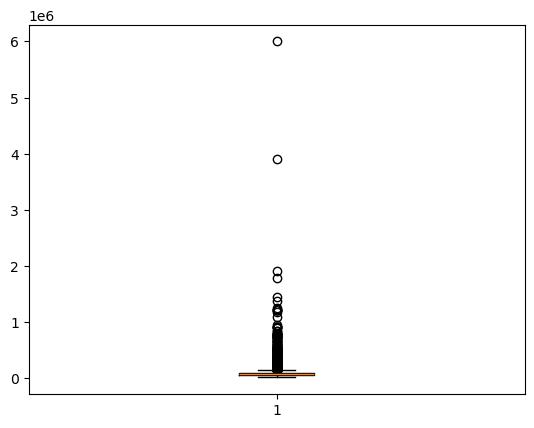

In [48]:
#max is >>>>> than mean. box plot to see the 25% to 75%
plt.boxplot(loan_data.annual_inc)
plt.show()

In [49]:
#we need to take the upper and lower quarterile for analysis and remove outliers
#box plot fence is 25percentile - 1.5*IQR to 75 percentile + 1.5*IQR
annual_inc_25 = loan_data["annual_inc"].quantile(0.25)
annual_inc_75 = loan_data["annual_inc"].quantile(0.75)
annual_inc_iqr = annual_inc_75 - annual_inc_25
annual_inc_lower = annual_inc_25 - annual_inc_iqr*1.5
annual_inc_upper = annual_inc_75 + annual_inc_iqr*1.5

In [50]:
loan_data= loan_data[((loan_data.annual_inc > annual_inc_lower) & (loan_data.annual_inc < annual_inc_upper))]
loan_data.annual_inc.describe()


count     36094.000000
mean      61141.302692
std       28026.349818
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

In [51]:
loan_data.shape

(36094, 21)

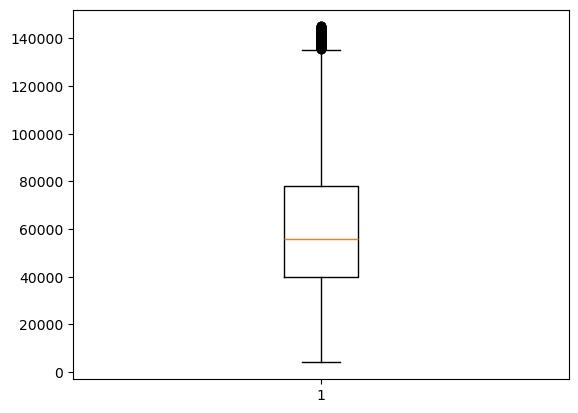

In [52]:
plt.boxplot(loan_data.annual_inc)
plt.show()

In [53]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)

In [54]:
loan_data.home_ownership.value_counts()

home_ownership
RENT        17678
MORTGAGE    15526
OWN          2797
OTHER          93
Name: count, dtype: int64

In [55]:
loan_data.verification_status.value_counts()

verification_status
Not Verified       15647
Verified           11268
Source Verified     9179
Name: count, dtype: int64

In [56]:
#source verfied and verifed are one and same. we need to replace Source Verified with Verified
loan_data.verification_status.replace("Source Verified", "Verified", inplace = True)
loan_data.verification_status.value_counts()

verification_status
Verified        20447
Not Verified    15647
Name: count, dtype: int64

In [57]:
loan_data.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
open_acc                0
total_acc               0
total_pymnt             0
pub_rec_bankruptcies    0
dtype: int64

In [58]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36094 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36094 non-null  int64         
 1   funded_amnt           36094 non-null  int64         
 2   funded_amnt_inv       36094 non-null  float64       
 3   term                  36094 non-null  int32         
 4   int_rate              36094 non-null  float64       
 5   installment           36094 non-null  float64       
 6   grade                 36094 non-null  object        
 7   sub_grade             36094 non-null  object        
 8   emp_length            36094 non-null  object        
 9   home_ownership        36094 non-null  object        
 10  annual_inc            36094 non-null  float64       
 11  verification_status   36094 non-null  object        
 12  issue_d               36094 non-null  datetime64[ns]
 13  loan_status          

In [59]:
loan_data.emp_length.head(10)

0     10+ years
1      < 1 year
2     10+ years
3     10+ years
5       3 years
6       8 years
7       9 years
8       4 years
9      < 1 year
10      5 years
Name: emp_length, dtype: object

In [60]:
#we need to map years of experience to integers
# < 1 years : 0, 1 years : 1... 10+ years to : 10
loan_data["emp_length"] = loan_data["emp_length"].map({ "< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, 
                                                       "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, 
                                                       "8 years": 8, "9 years": 9, "10+ years": 10})
loan_data["emp_length"].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [61]:
#use the date column and add new columns for month, year and quarter for analysis
loan_data["issue_m"] = pd.DatetimeIndex(loan_data["issue_d"]).month
loan_data["issue_y"] = pd.DatetimeIndex(loan_data["issue_d"]).year

In [62]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies,issue_m,issue_y
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,fully paid,credit_card,AZ,27.65,3,9,5863.16,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,charged off,car,GA,1.00,3,4,1008.71,0.0,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,fully paid,small_business,IL,8.72,2,10,3005.67,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,fully paid,other,CA,20.00,10,37,12231.89,0.0,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,fully paid,wedding,AZ,11.20,9,12,5632.21,0.0,12,2011


In [63]:
loan_data["issue_q"] = pd.PeriodIndex(loan_data["issue_d"] ,freq="Q")

In [64]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,open_acc,total_acc,total_pymnt,pub_rec_bankruptcies,issue_m,issue_y,issue_q
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,AZ,27.65,3,9,5863.16,0.0,12,2011,2011Q4
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,car,GA,1.00,3,4,1008.71,0.0,12,2011,2011Q4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,IL,8.72,2,10,3005.67,0.0,12,2011,2011Q4
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,CA,20.00,10,37,12231.89,0.0,12,2011,2011Q4
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,AZ,11.20,9,12,5632.21,0.0,12,2011,2011Q4


In [65]:
loan_data.loan_status.value_counts()

loan_status
fully paid     30777
charged off     5317
Name: count, dtype: int64

In [66]:
#preparing buckets for better analysis. target columns are loan_amount, annual_income, interest rate, DTI
loan_data.loan_amnt.describe()

count    36094.000000
mean     10712.788137
std       7073.343173
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [67]:
#buckets of less than 5k, 5-10k, 10-15k, more than 15k
loan_amnt_bins = [0, 5000, 10000, 15000, 35000]
loan_amnt_lbl = ["0 - 5K", "5K - 10K", "10K - 15K", "15K - above"]
loan_data["loan_amnt_bckt"] = pd.cut(loan_data["loan_amnt"], bins = loan_amnt_bins, labels = loan_amnt_lbl)

In [68]:
loan_data[["loan_amnt", "loan_amnt_bckt"]].head()

,loan_amnt,loan_amnt_bckt
0,5000,0 - 5K
1,2500,0 - 5K
2,2400,0 - 5K
3,10000,5K - 10K
5,5000,0 - 5K


In [69]:
loan_data.int_rate.describe()

count    36094.000000
mean        11.910947
std          3.687779
min          5.420000
25%          8.940000
50%         11.710000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [70]:
#buckets of less than 5, 5-10, 10-15, 15-20, 20-25
int_rate_bins = [0, 5, 10, 15, 20, 25]
int_rate_lbl = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%"]
loan_data["int_rate_bckt"] = pd.cut(loan_data["int_rate"], bins = int_rate_bins, labels = int_rate_lbl)
loan_data[["int_rate", "int_rate_bckt"]].head()

,int_rate,int_rate_bckt
0,10.65,10-15%
1,15.27,15-20%
2,15.96,15-20%
3,13.49,10-15%
5,7.90,5-10%


In [71]:
loan_data.annual_inc.describe()

count     36094.000000
mean      61141.302692
std       28026.349818
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

In [72]:
#buckets of annual income
annual_inc_bins = [0, 40000, 50000, 60000, 70000, 80000, 145000]
annual_inc_lbl = ["0-40K", "40-50K", "50-60K", "60-70K", "70-80K", "80K - above"]
loan_data["annual_inc_bckt"] = pd.cut(loan_data["annual_inc"], bins = annual_inc_bins, labels = annual_inc_lbl)
loan_data[["annual_inc", "annual_inc_bckt"]].head()

,annual_inc,annual_inc_bckt
0,24000.0,0-40K
1,30000.0,0-40K
2,12252.0,0-40K
3,49200.0,40-50K
5,36000.0,0-40K


In [73]:
loan_data.dti.describe()

count    36094.000000
mean        13.483214
std          6.654161
min          0.000000
25%          8.390000
50%         13.620000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [74]:
#buckets of dti
dti_bins = [0, 8, 12, 16, 20, 30]
dti_lbl = ["very low", "low", "med", "high", "very high"]
loan_data["dti_bckt"] = pd.cut(loan_data["dti"], bins = dti_bins, labels = dti_lbl)
loan_data[["dti", "dti_bckt"]].head()

,dti,dti_bckt
0,27.65,very high
1,1.00,very low
2,8.72,low
3,20.00,high
5,11.20,low


In [75]:
loan_data["loan_paid"] = loan_data["loan_status"].map({ "charged off": "No", "fully paid": "Yes"})
loan_data["loan_paid"].head()


0    Yes
1     No
2    Yes
3    Yes
5    Yes
Name: loan_paid, dtype: object

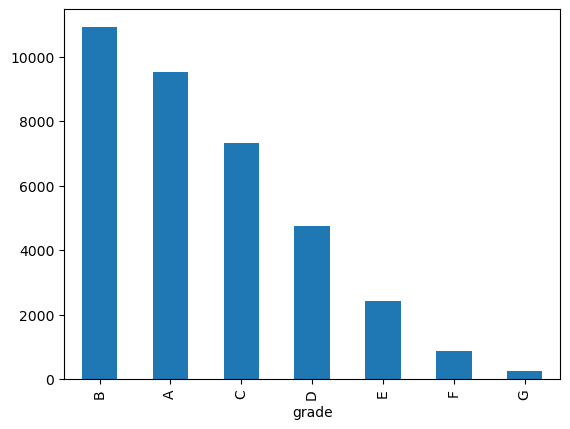

In [76]:
#Perform EDA as we have the data set ready
#bar plots for ordered catergorical values for overall
loan_data["grade"].value_counts().plot.bar()
plt.show()

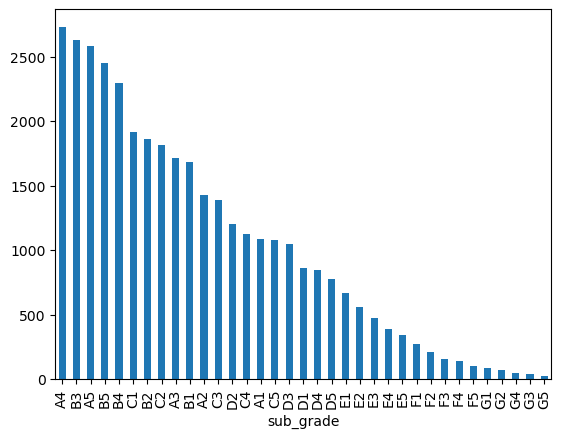

In [77]:
loan_data["sub_grade"].value_counts().plot.bar()
plt.show()

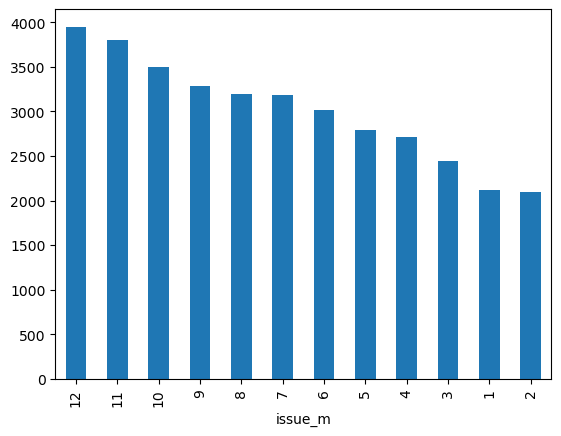

In [78]:
loan_data["issue_m"].value_counts().plot.bar()
plt.show()

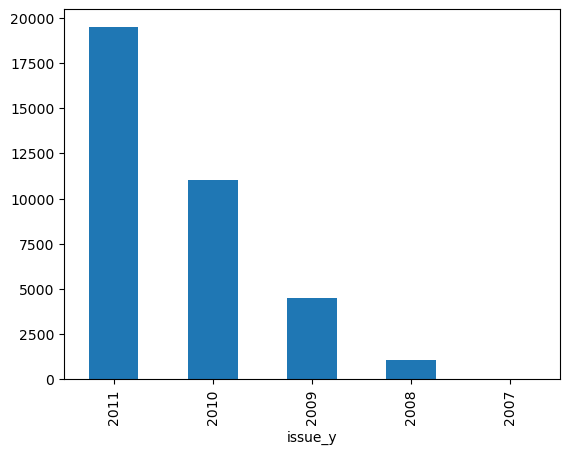

In [79]:
loan_data["issue_y"].value_counts().plot.bar()
plt.show()

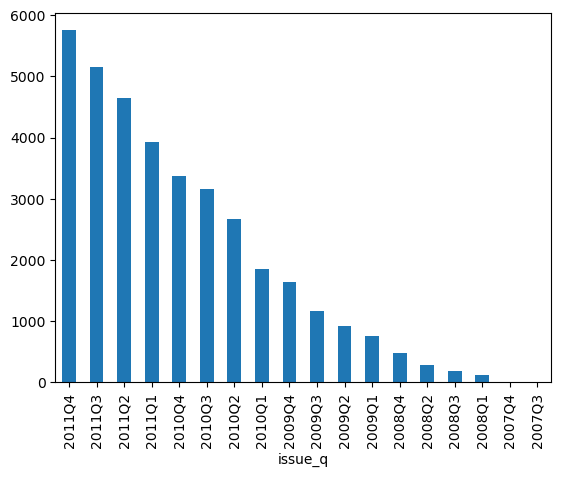

In [80]:
loan_data["issue_q"].value_counts().plot.bar()
plt.show()

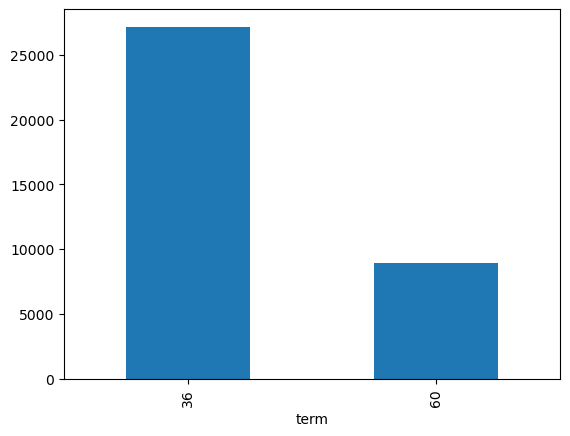

In [81]:
loan_data["term"].value_counts().plot.bar()
plt.show()

In [82]:
loan_data["loan_paid"].head()

0    Yes
1     No
2    Yes
3    Yes
5    Yes
Name: loan_paid, dtype: object

In [83]:
#bar plots for ordered catergorical values for charged_off
loan_data_charged_off = loan_data[loan_data["loan_paid"] == "No"]
loan_data_charged_off.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,pub_rec_bankruptcies,issue_m,issue_y,issue_q,loan_amnt_bckt,int_rate_bckt,annual_inc_bckt,dti_bckt,loan_paid
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1008.71,0.0,12,2011,2011Q4,0 - 5K,15-20%,0-40K,very low,No
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,646.02,0.0,12,2011,2011Q4,5K - 10K,20-25%,0-40K,very low,No
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,...,1476.19,0.0,12,2011,2011Q4,5K - 10K,10-15%,0-40K,high,No
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,...,2270.70,0.0,12,2011,2011Q4,5K - 10K,10-15%,0-40K,low,No
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,...,7471.99,0.0,12,2011,2011Q4,5K - 10K,10-15%,80K - above,very low,No


In [84]:
loan_data_charged_off.shape

(5317, 29)

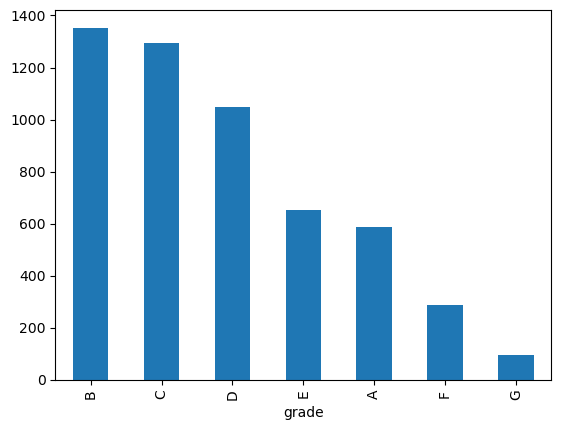

In [85]:
loan_data_charged_off["grade"].value_counts().plot.bar()
plt.show()

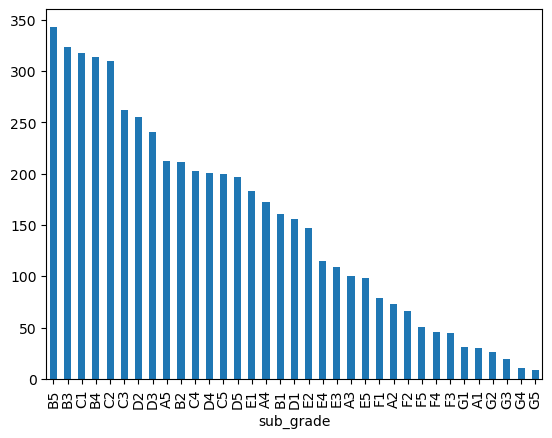

In [86]:
loan_data_charged_off["sub_grade"].value_counts().plot.bar()
plt.show()

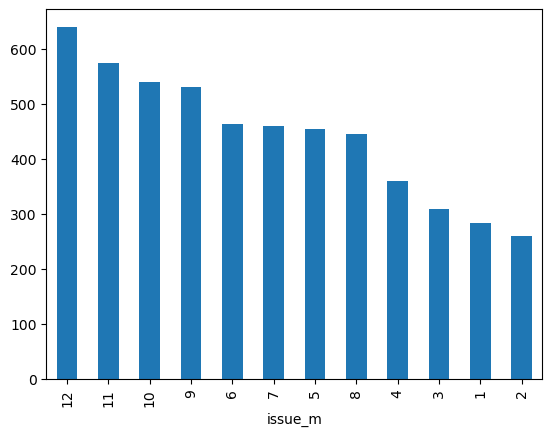

In [87]:
loan_data_charged_off["issue_m"].value_counts().plot.bar()
plt.show()

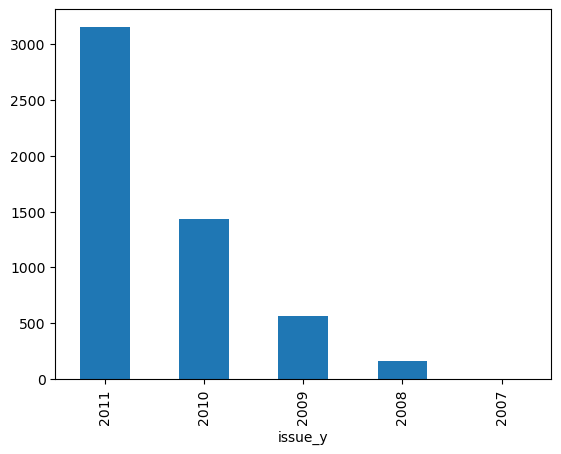

In [88]:
loan_data_charged_off["issue_y"].value_counts().plot.bar()
plt.show()

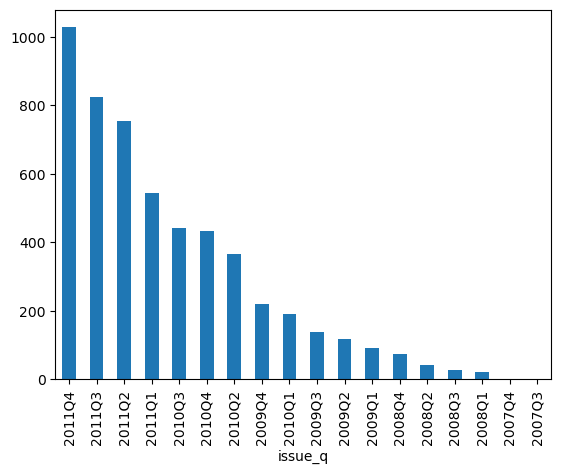

In [89]:
loan_data_charged_off["issue_q"].value_counts().plot.bar()
plt.show()

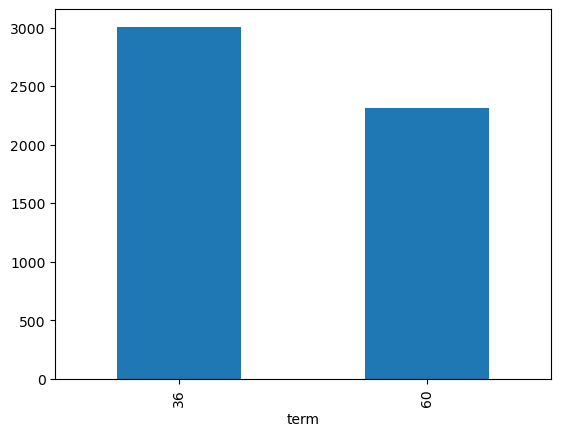

In [90]:
loan_data_charged_off["term"].value_counts().plot.bar()
plt.show()

# analysis 
- for overall and not paid loan, 36 months term is higher than 60 months
- Grade B is the highest contributor in not paid loans
- 2011Q4 has the highest amount of not paid loans and overall loans
- within Grade B, sub-grade B5 is the highest contributor in non paid loans

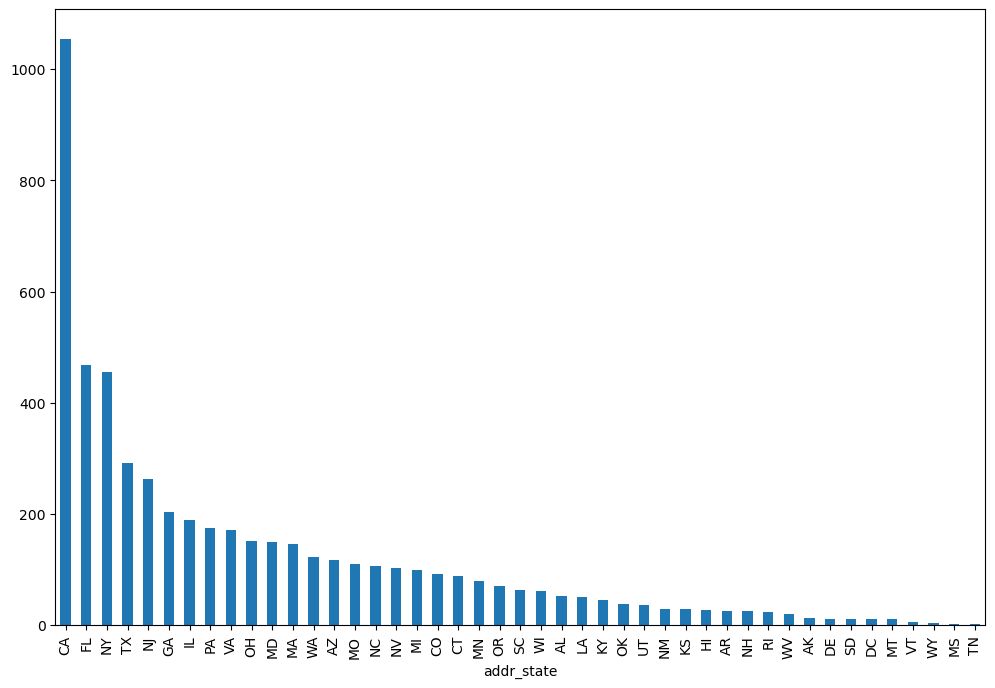

In [91]:
plt.figure(figsize=[12,8])
loan_data_charged_off["addr_state"].value_counts().plot.bar()
plt.show()

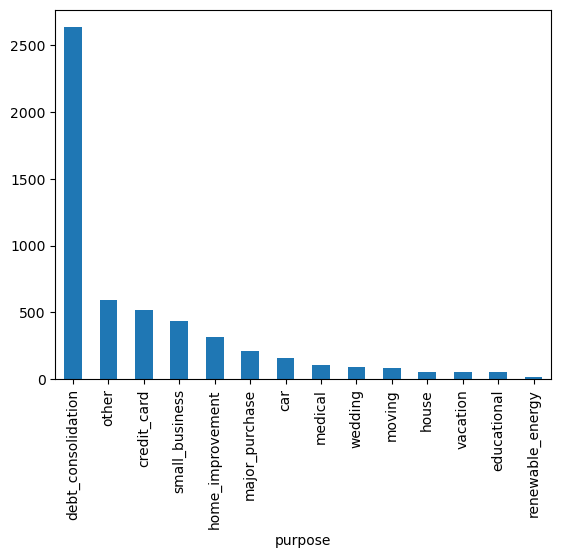

In [92]:
loan_data_charged_off["purpose"].value_counts().plot.bar()
plt.show()

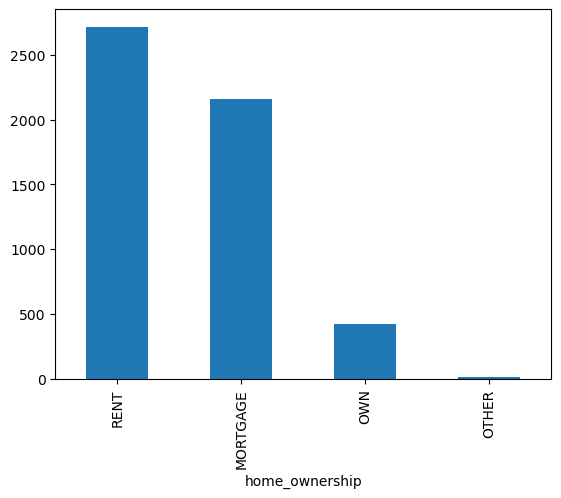

In [93]:
loan_data_charged_off["home_ownership"].value_counts().plot.bar()
plt.show()

# Analysis
- Debt Consolidation is the biggest contribution of not paid loans
- Among home owners, one on Rent are the highest contributors in not paid loans
- State of CA has the highest number of not paid loans

# now for the analysis of all bucketed categories
- annual income buckets
- interest rate buckets
- loan amount buckets
- DTI buckets

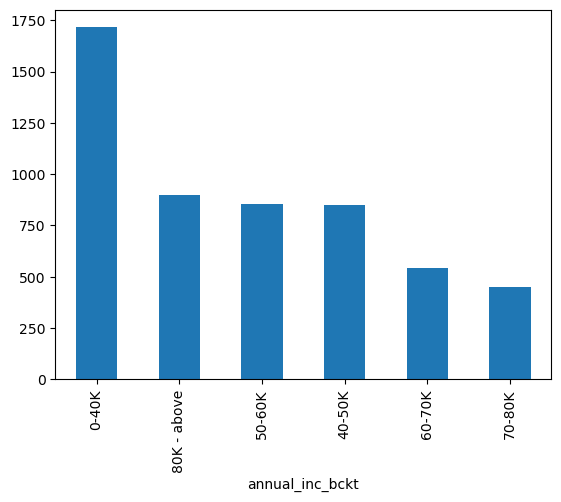

In [94]:
loan_data_charged_off["annual_inc_bckt"].value_counts().plot.bar()
plt.show()

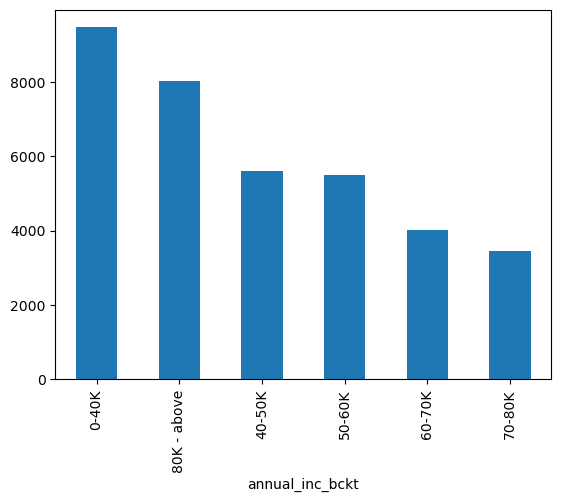

In [95]:
loan_data["annual_inc_bckt"].value_counts().plot.bar()
plt.show()

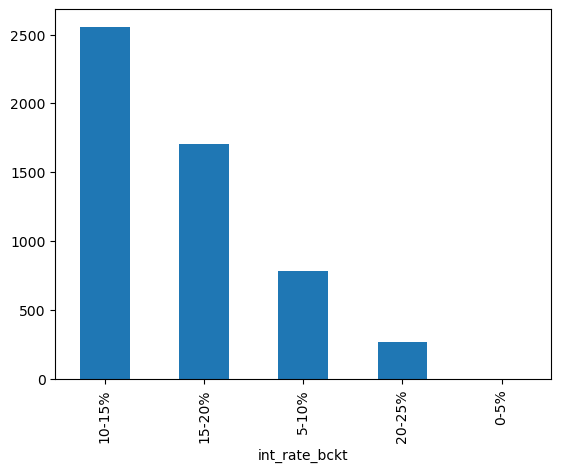

In [96]:
loan_data_charged_off["int_rate_bckt"].value_counts().plot.bar()
plt.show()

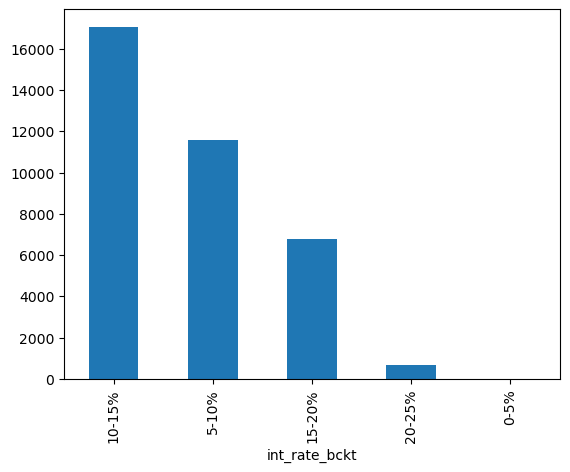

In [97]:
loan_data["int_rate_bckt"].value_counts().plot.bar()
plt.show()

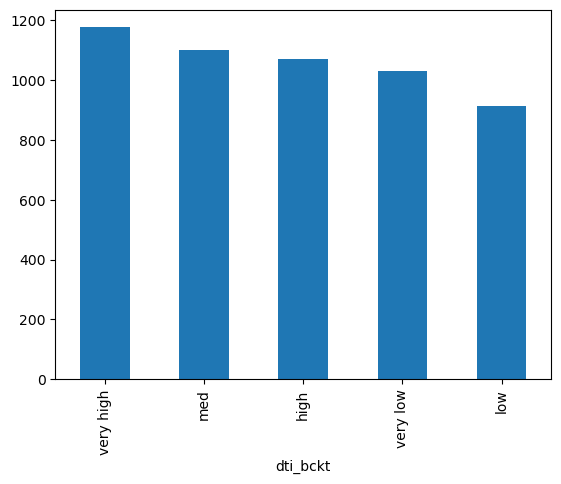

In [98]:
loan_data_charged_off["dti_bckt"].value_counts().plot.bar()
plt.show()

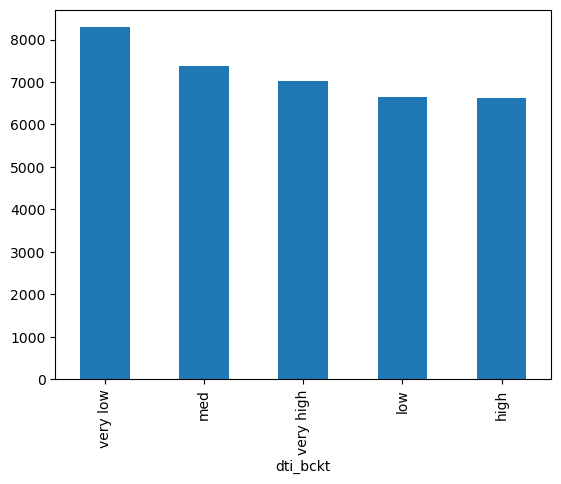

In [99]:
loan_data["dti_bckt"].value_counts().plot.bar()
plt.show()

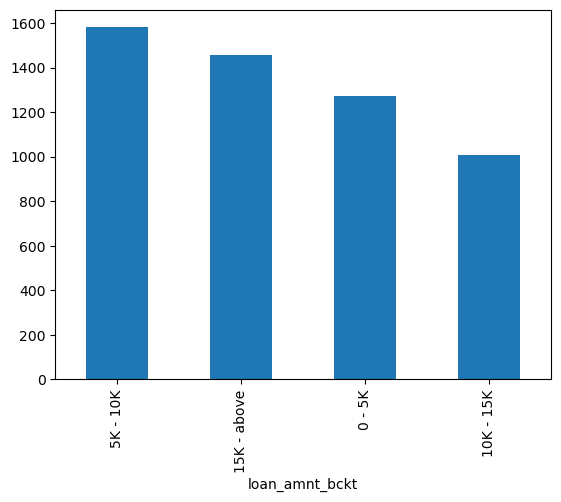

In [100]:
loan_data_charged_off["loan_amnt_bckt"].value_counts().plot.bar()
plt.show()

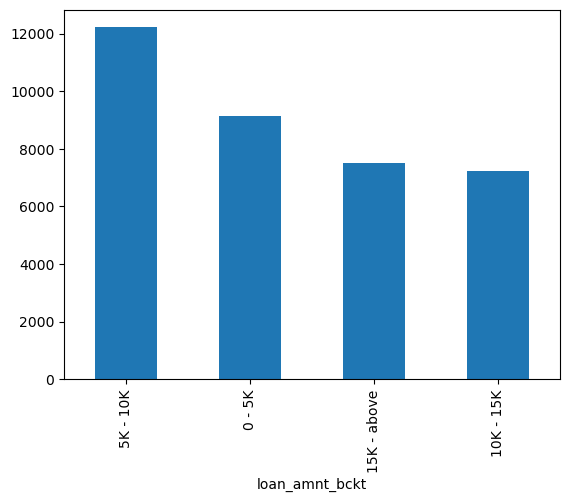

In [101]:
loan_data["loan_amnt_bckt"].value_counts().plot.bar()
plt.show()

# Analysis
- For both fully paid and charged off loans
  - 0-40K is the highest bucket
  - 10-15% is the most seen interest rate
  - DTI buckets don't see major variations
  - people with 5-10K loan amount is the highest

# bi-variate analysis
- bucketed categories vs loan status
- year, quarter vs loan status
- grade, subgrade vs loan status
- state vs loan status

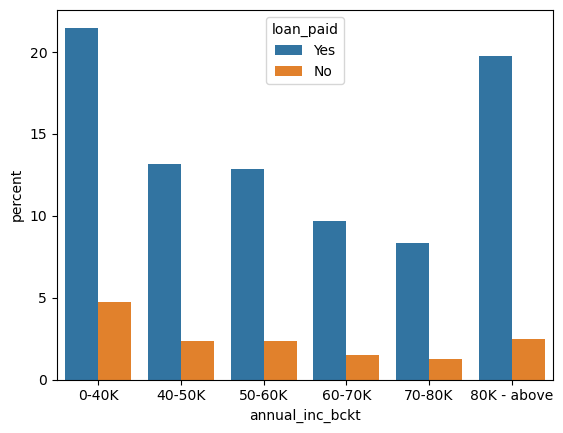

In [102]:
sns.countplot(loan_data, x="annual_inc_bckt", hue="loan_paid", stat="percent", legend = "full")
plt.show()

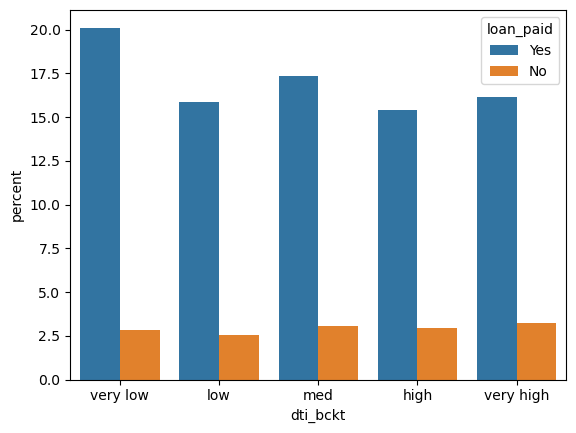

In [103]:
sns.countplot(loan_data, x="dti_bckt", hue="loan_paid", stat="percent", legend = "full")
plt.show()

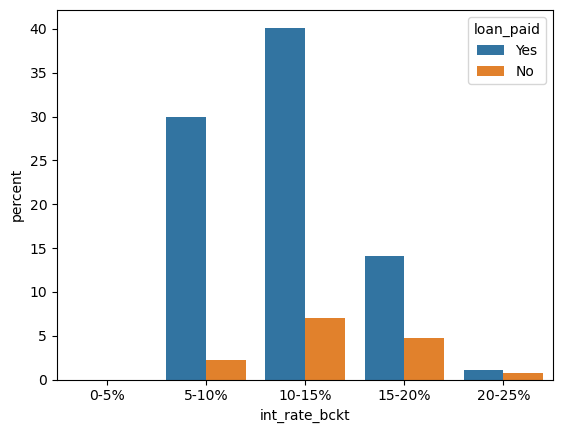

In [104]:
sns.countplot(loan_data, x="int_rate_bckt", hue="loan_paid", stat="percent", legend = "full")
plt.show()

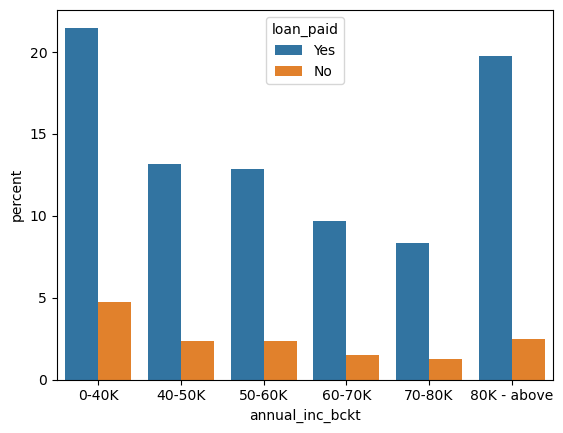

In [105]:
sns.countplot(loan_data, x="annual_inc_bckt", hue="loan_paid", stat="percent", legend = "full")
plt.show()

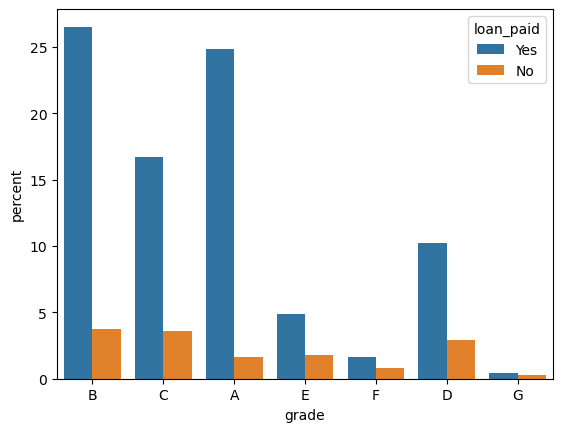

In [106]:
sns.countplot(loan_data, x="grade", hue="loan_paid", stat="percent", legend = "full")
plt.show()

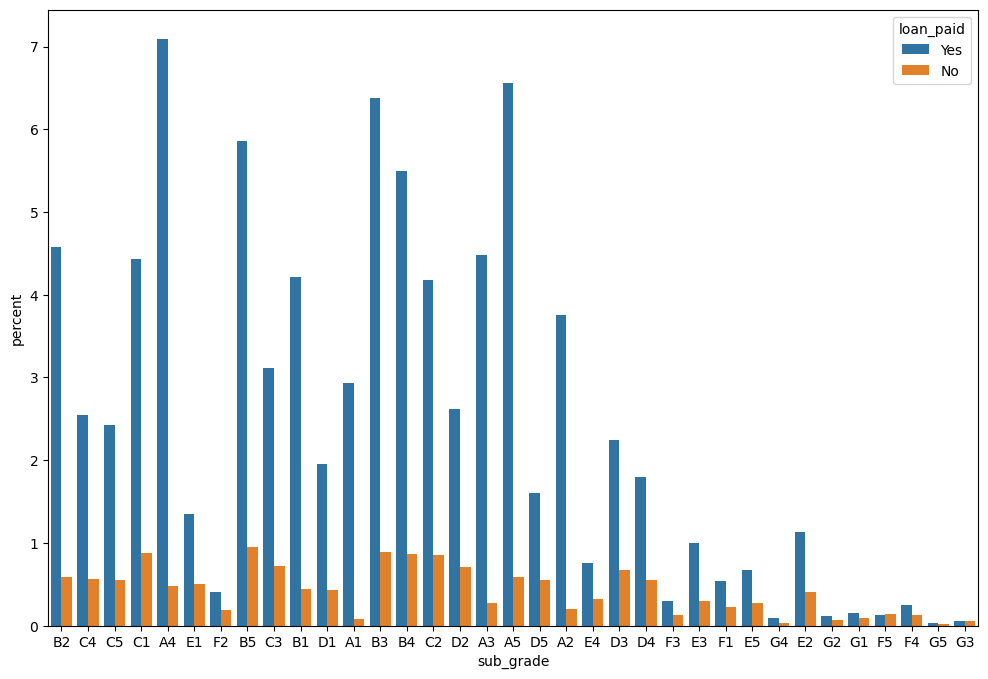

In [107]:
plt.figure(figsize=[12,8])
sns.countplot(loan_data, x="sub_grade", hue="loan_paid", stat="percent", legend = "full")
plt.show()

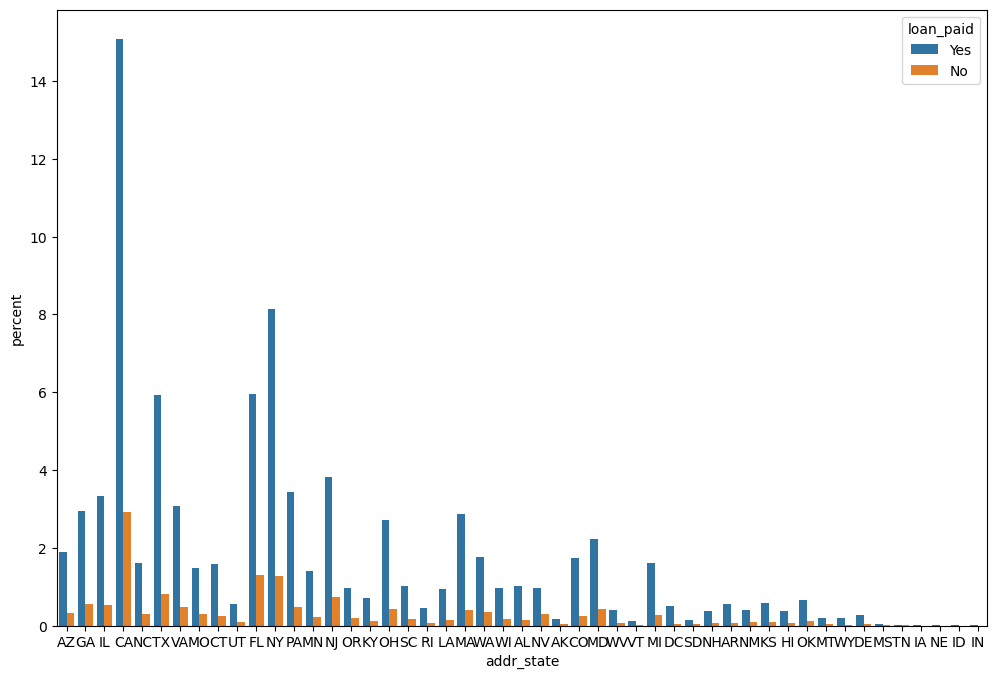

In [108]:
plt.figure(figsize=[12,8])
sns.countplot(loan_data, x="addr_state", hue="loan_paid", stat="percent", legend = "full")
plt.show()

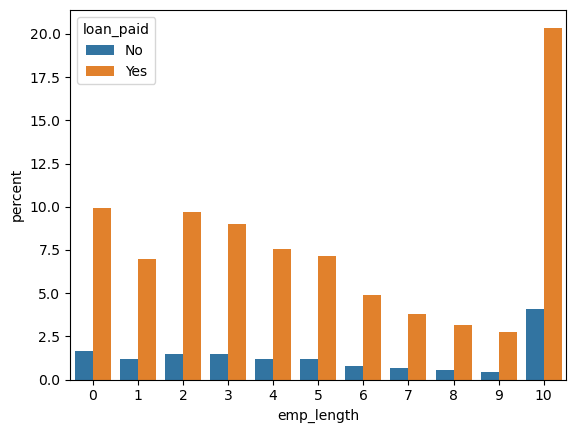

In [109]:
sns.countplot(loan_data, x="emp_length", hue="loan_paid", stat="percent", legend = "full")
plt.show()

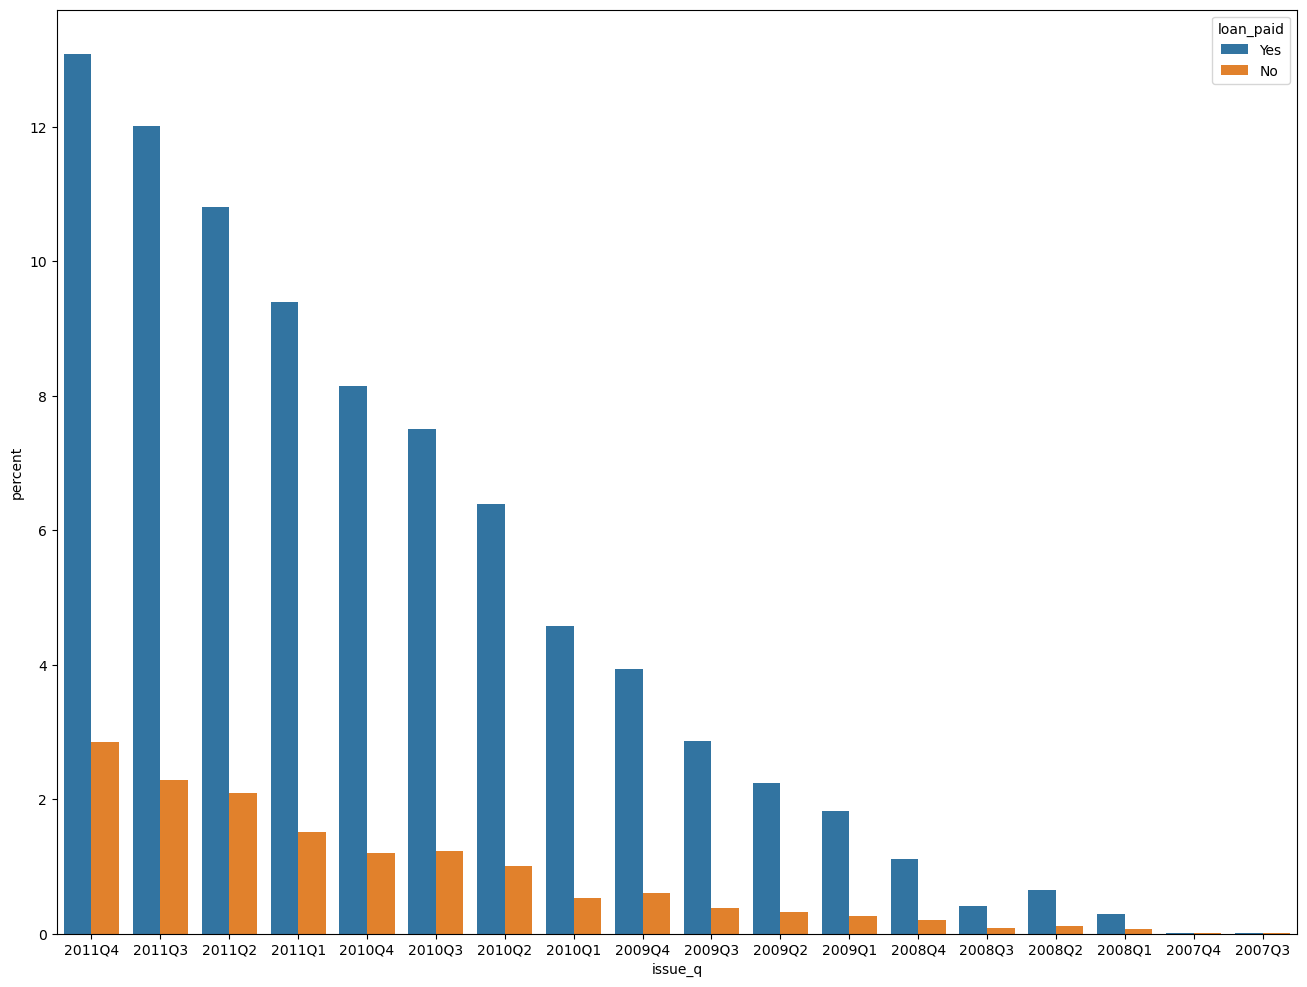

In [110]:
plt.figure(figsize=[16,12])
sns.countplot(loan_data, x="issue_q", hue="loan_paid", stat="percent", legend = "full")
plt.show()

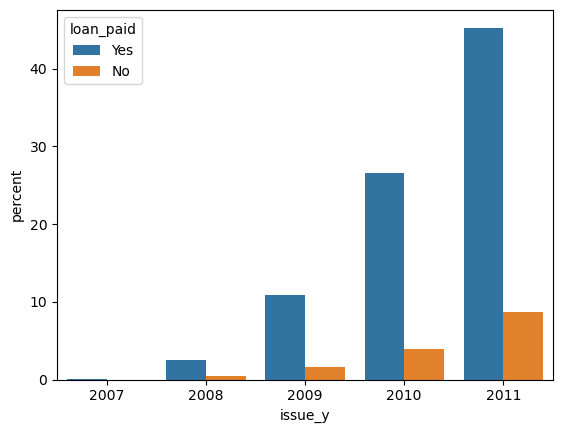

In [111]:
sns.countplot(loan_data, x="issue_y", hue="loan_paid", stat="percent", legend = "full")
plt.show()

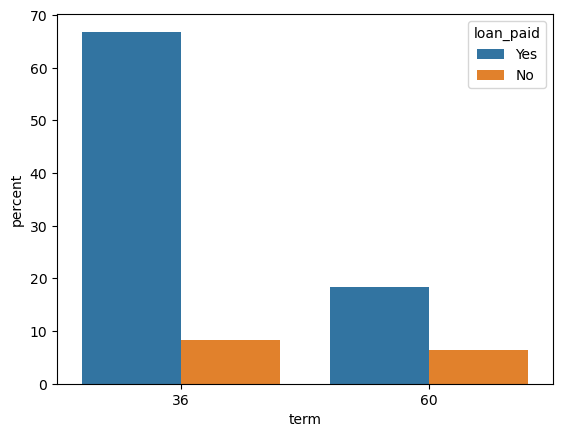

In [112]:
sns.countplot(loan_data, x="term", hue="loan_paid", stat="percent", legend = "full")
plt.show()

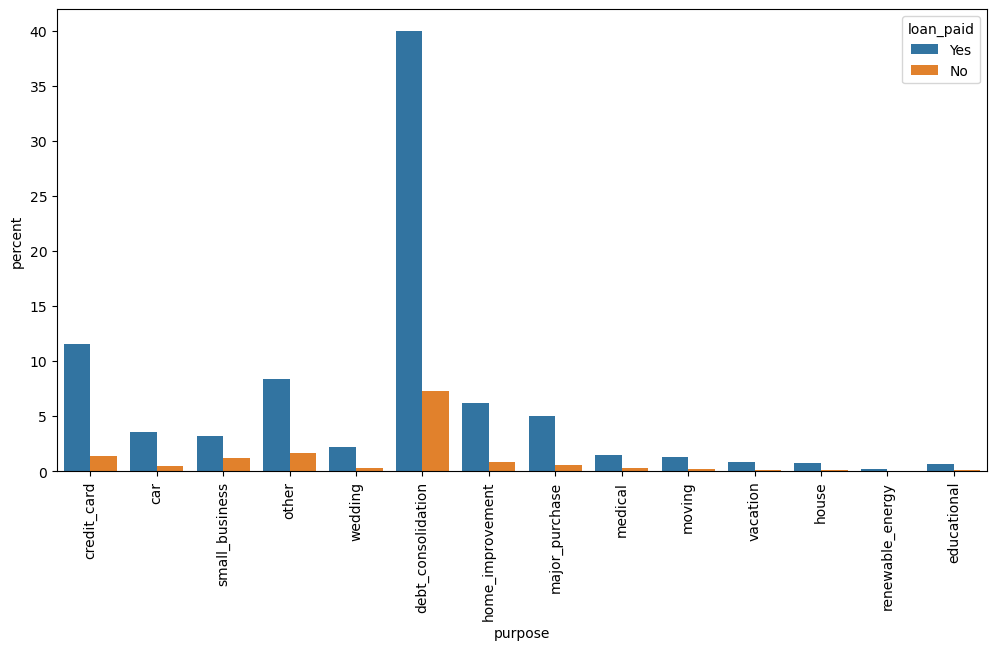

In [113]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(loan_data, x="purpose", hue="loan_paid", stat="percent", legend = "full", ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

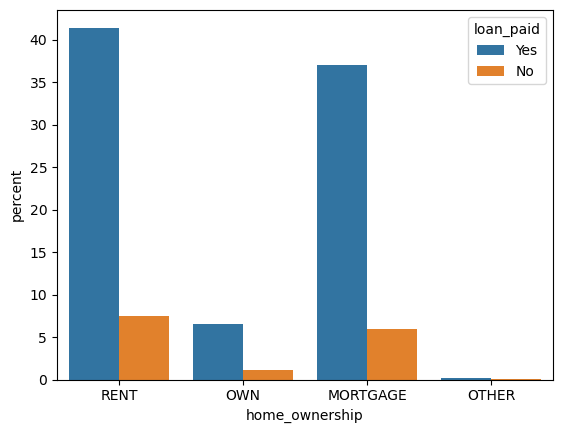

In [114]:
sns.countplot(loan_data, x="home_ownership", hue="loan_paid", stat="percent", legend = "full")
plt.show()

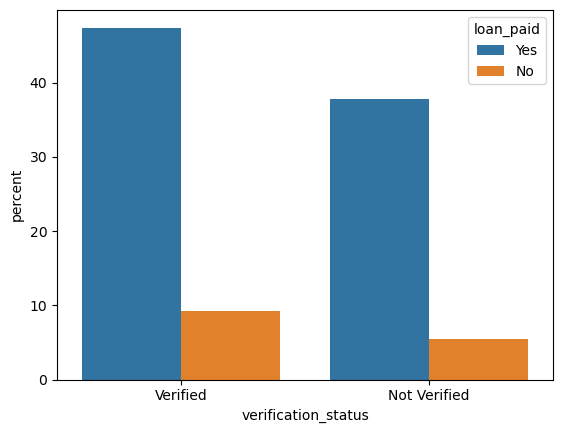

In [115]:
sns.countplot(loan_data, x="verification_status", hue="loan_paid", stat="percent", legend = "full")
plt.show()


# Analysis
- People with Rental home ownership are on the higher side not paying the loan off.
- Debt consolidation is the highest purpose of loans and also for not paying off loans. 
- Short team loans have higher chances of not doing loan repayment.
- Quarter 4 has the highest percentage of loan defaulters, mostly during the holiday season.
- Employee of experience > 10+ years are most likely to default. 
- Grade B, sub-grage B3, B4, B5 are the highest contributors of loan defaulters. 
- Annual income group 0-40K has the highest defaulting percentage. 

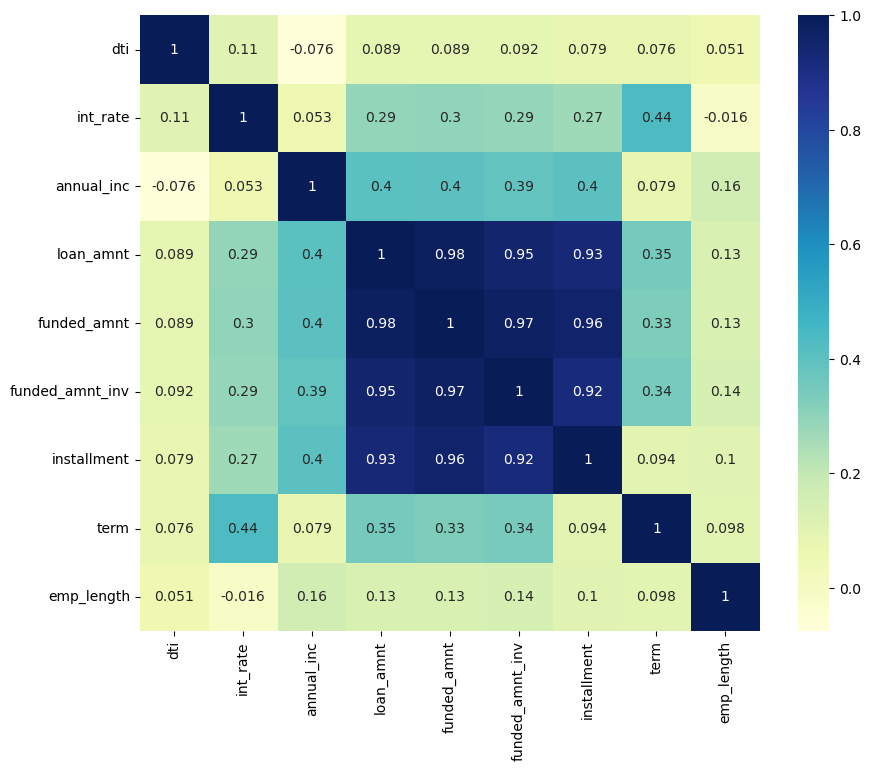

In [116]:
#heat map
plt.figure(figsize=[10,8])
loan_data_heat = loan_data[[ "dti", "int_rate", "annual_inc", "loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "term", "emp_length"]].corr()
sns.heatmap(loan_data_heat, annot=True, cmap="YlGnBu")
plt.show()

# Analysis
- Strong co-relation between Loan Amount and Funded Amount.
- DTI has weak co-relation with all other parameters. 